In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
from google.colab import files
import io

In [9]:
uploaded = files.upload()

Saving X_opening.csv to X_opening (1).csv


In [0]:
X = pd.read_csv(io.BytesIO(uploaded['X_opening.csv']))
Y = X['worldwide_gross']
X = X.drop('worldwide_gross', axis = 1)

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 1)

In [0]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X, Y, random_state = 1)

In [14]:
pd.DataFrame.equals(X_train, X2_train)

True

In [2]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso

scores = cross_val_score(Lasso(), X, Y, cv=5, scoring ='r2')
scores

NameError: ignored

In [16]:
scores.mean()

0.44964021745791766

In [17]:
Lasso().fit(X_train, Y_train).score(X_test, Y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.4528531114939167e+18, tolerance: 7479170615554818.0
  positive)


0.7926190294963359

In [1]:
!pip install --upgrade scikit-learn

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.23.1)


In [0]:
from sklearn.linear_model import Lasso

In [11]:
from sklearn.model_selection import cross_validate

results = cross_validate(Lasso(), X, Y, return_train_score =True, cv=5)
results

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.3531444112586967e+18, tolerance: 8334877530886788.0
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.6937642436249027e+18, tolerance: 8653617519237807.0
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.366305050945958e+18, tolerance: 8543073557124824.0
  positive)


{'fit_time': array([0.01283121, 0.0324719 , 0.02683568, 0.03970218, 0.02165723]),
 'score_time': array([0.0031209 , 0.00414777, 0.00395942, 0.00358939, 0.0034287 ]),
 'test_score': array([0.59316596, 0.68931527, 0.55383855, 0.18147236, 0.23040894]),
 'train_score': array([0.68988012, 0.77004932, 0.76604995, 0.76123379, 0.75837599])}

In [12]:
test_scores = results['test_score']
train_scores = results['train_score']
print(np.mean(train_scores))
print(np.mean(test_scores))

0.7491178363039036
0.44964021745791766


In [14]:
from sklearn.neighbors import KNeighborsRegressor

cross_validate(KNeighborsRegressor(), X, Y, cv=5)

{'fit_time': array([0.01457691, 0.0060637 , 0.00418139, 0.00427771, 0.00402808]),
 'score_time': array([0.00538087, 0.00518918, 0.00500965, 0.00498343, 0.0042305 ]),
 'test_score': array([0.3647382 , 0.59274527, 0.21545625, 0.15143495, 0.25635077])}

In [15]:
cross_validate(KNeighborsRegressor(n_neighbors=10), X, Y, cv=5)

{'fit_time': array([0.01097655, 0.00434709, 0.00457931, 0.00779724, 0.00418043]),
 'score_time': array([0.00587487, 0.01088023, 0.00580287, 0.00603247, 0.00510001]),
 'test_score': array([0.23553954, 0.61921355, 0.24881301, 0.1209604 , 0.2466995 ])}

In [16]:
n =np.arange(2,50,2)
n

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
       36, 38, 40, 42, 44, 46, 48])

In [0]:
from sklearn.model_selection import validation_curve

train_scores, test_scores = validation_curve(KNeighborsRegressor(n_neighbors=10),
                                             X,
                                             Y,
                                             param_name='n_neighbors',
                                             param_range = n,
                                             cv = 5)

In [19]:
np.mean(train_scores, axis=1)

array([0.86831591, 0.79120817, 0.7593398 , 0.7498298 , 0.74238245,
       0.73284018, 0.72586058, 0.71779833, 0.71281982, 0.70976325,
       0.70723469, 0.70502429, 0.70174649, 0.69741543, 0.69379214,
       0.69163113, 0.68955146, 0.6862285 , 0.68321376, 0.68018032,
       0.67885534, 0.67522056, 0.67135123, 0.66953759])

([<matplotlib.axis.XTick at 0x7f6747121208>,
 [Text(0, 0, '2'),
  Text(0, 0, '4'),
  Text(0, 0, '6'),
  Text(0, 0, '8'),
  Text(0, 0, '10'),
  Text(0, 0, '12'),
  Text(0, 0, '14'),
  Text(0, 0, '16'),
  Text(0, 0, '18'),
  Text(0, 0, '20'),
  Text(0, 0, '22'),
  Text(0, 0, '24'),
  Text(0, 0, '26'),
  Text(0, 0, '28'),
  Text(0, 0, '30'),
  Text(0, 0, '32'),
  Text(0, 0, '34'),
  Text(0, 0, '36'),
  Text(0, 0, '38'),
  Text(0, 0, '40'),
  Text(0, 0, '42'),
  Text(0, 0, '44'),
  Text(0, 0, '46'),
  Text(0, 0, '48')])

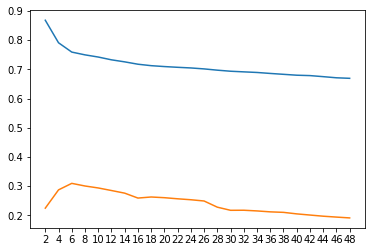

In [20]:
plt.plot(np.mean(train_scores, axis=1))
plt.plot(np.mean(test_scores, axis=1))
plt.xticks(np.arange(24),n)

In [0]:
from sklearn.model_selection import learning_curve
lc =learning_curve(KNeighborsRegressor(n_neighbors=6), X, Y, cv=5)
samples, train, test = lc[0], lc[1], lc[2]

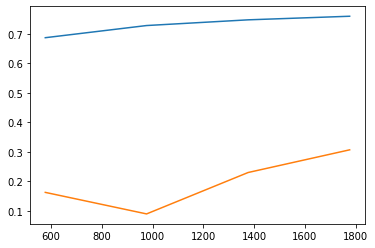

In [26]:
plt.plot(samples[1:], np.mean(train, axis=1)[1:])
plt.plot(samples[1:], np.mean(test, axis=1)[1:])

In [0]:
import warnings
warnings.simplefilter("ignore")

In [0]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth = 2)

In [0]:
X_train, X_test, Y_train, Y_test =train_test_split(X, Y, random_state=1)

In [32]:
model.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=2)

In [0]:
import graphviz

In [0]:
from sklearn.tree import export_graphviz

treedot = export_graphviz(model, 
                          out_file=None, 
                          feature_names = X.columns)

In [38]:
treedot

'digraph Tree {\nnode [shape=box] ;\n0 [label="opening_gross <= 41613376.0\\nmse = 4.491994363696598e+16\\nsamples = 1665\\nvalue = 141540319.054"] ;\n1 [label="opening_gross <= 22074047.0\\nmse = 1.333382219312784e+16\\nsamples = 1506\\nvalue = 92999937.199"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="mse = 4923666241203546.0\\nsamples = 1257\\nvalue = 64781848.271"] ;\n1 -> 2 ;\n3 [label="mse = 3.1478131019987736e+16\\nsamples = 249\\nvalue = 235450289.735"] ;\n1 -> 3 ;\n4 [label="opening_gross <= 70351576.0\\nmse = 1.103981187159358e+17\\nsamples = 159\\nvalue = 601300162.289"] ;\n0 -> 4 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n5 [label="mse = 4.067538845924515e+16\\nsamples = 92\\nvalue = 440868287.554"] ;\n4 -> 5 ;\n6 [label="mse = 1.2226485798747584e+17\\nsamples = 67\\nvalue = 821594676.851"] ;\n4 -> 6 ;\n}'

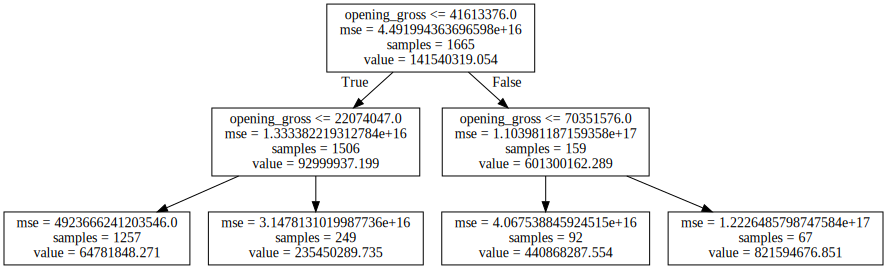

In [39]:
graphviz.Source(treedot)

In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate

forest = RandomForestRegressor(200)
results =cross_validate(forest, X,Y, cv=5, scoring='r2',return_train_score=True)

In [44]:
test_scores = results['test_score']
train_scores = results['train_score']
print(np.mean(train_scores))
print(np.mean(test_scores))

0.9654460999286613
0.5171606903664927


In [0]:
from sklearn.ensemble import GradientBoostingRegressor

ensemble = GradientBoostingRegressor()
results = cross_validate(ensemble, X, Y, cv = 5, scoring='r2',return_train_score=True)

In [48]:
test_scores = results['test_score']
train_scores = results['train_score']
print(np.mean(train_scores))
print(np.mean(test_scores))

0.9151392143549633
0.5256153507525196


In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)

In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
param_test1 = {'n_estimators':range(20, 501, 20)}

In [54]:
list(param_test1['n_estimators'])

[20,
 40,
 60,
 80,
 100,
 120,
 140,
 160,
 180,
 200,
 220,
 240,
 260,
 280,
 300,
 320,
 340,
 360,
 380,
 400,
 420,
 440,
 460,
 480,
 500]

In [0]:
estimator = GradientBoostingRegressor(learning_rate=0.1, 
                                      min_samples_split = 500,
                                      min_samples_leaf = 50,
                                      max_depth = 8,
                                      max_features = 'sqrt',
                                      subsample=0.8,
                                      random_state = 10)

In [0]:
gsearch1 = GridSearchCV(estimator, param_grid=param_test1,
                        scoring='r2',
                        cv=5)

In [57]:
gsearch1.fit(X_train, Y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingRegressor(max_depth=8,
                                                 max_features='sqrt',
                                                 min_samples_leaf=50,
                                                 min_samples_split=500,
                                                 random_state=10,
                                                 subsample=0.8),
             param_grid={'n_estimators': range(20, 501, 20)}, scoring='r2')

In [59]:
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([0.02955413, 0.05343175, 0.07929659, 0.10428843, 0.1344007 ,
         0.15962949, 0.18548369, 0.21115661, 0.23585296, 0.27052875,
         0.29161639, 0.32168193, 0.3465816 , 0.3734961 , 0.4053731 ,
         0.43233447, 0.4563004 , 0.48288159, 0.5108994 , 0.54102693,
         0.57116942, 0.59732947, 0.62022281, 0.65287671, 0.67965207]),
  'mean_score_time': array([0.00279303, 0.00294414, 0.0028635 , 0.00307693, 0.00328088,
         0.00340037, 0.00356588, 0.00373654, 0.00393333, 0.00418353,
         0.00423136, 0.0046361 , 0.00458732, 0.00475106, 0.00503435,
         0.00533004, 0.00543752, 0.00544581, 0.0057755 , 0.00578494,
         0.00599952, 0.00615983, 0.00627961, 0.00649261, 0.00674477]),
  'mean_test_score': array([0.65533772, 0.71947072, 0.73472393, 0.73893391, 0.74204852,
         0.74593224, 0.74954068, 0.75081976, 0.75256545, 0.7534906 ,
         0.75456927, 0.75530597, 0.75517149, 0.75388522, 0.75460231,
         0.75250064, 0.75350086, 0.75354341,

In [0]:
final_results = cross_validate(gsearch1.best_estimator_, X_train, Y_train, return_train_score=True)

In [64]:
test_scores = final_results['test_score']
train_scores = final_results['train_score']
print(np.mean(train_scores))
print(np.mean(test_scores))

0.8286608694466742
0.7553059694284988


In [0]:
estimator = GradientBoostingRegressor(learning_rate=0.1, 
                                      min_samples_split = 500,
                                      min_samples_leaf = 50,
                                      max_depth = 8,
                                      max_features = 'sqrt',
                                      subsample=0.8,
                                      random_state = 10,
                                      n_estimators=240)

In [67]:
estimator.fit(X_train, Y_train)

GradientBoostingRegressor(max_depth=8, max_features='sqrt', min_samples_leaf=50,
                          min_samples_split=500, n_estimators=240,
                          random_state=10, subsample=0.8)

In [68]:
estimator.score(X_test, Y_test)

0.8092888852563106